In [1]:
import numpy as np
from tables import open_file
import matplotlib.pyplot as plt

In [3]:
# path = "/mnt/storage2/phd/data/thunderstorm/Aragats_2020/muon_06.26/down_muon_minus.hdf5"
path_minus = "/home/zelenyy/muon_minus_uniform.hdf5"
paht_plus = "/home/zelenyy/muon_plus_uniform.hdf5"

In [3]:
with open_file(path) as h5file:
    for group in h5file.root:
        table = h5file.get_node(group, "particle_detector")
        print(repr(table.attrs))
        break

/sim0001/particle_detector._v_attrs (AttributeSet), 30 attributes:
   [CLASS := 'TABLE',
    FIELD_0_FILL := 0,
    FIELD_0_NAME := 'event',
    FIELD_1_FILL := 0,
    FIELD_1_NAME := 'particle',
    FIELD_2_FILL := 0.0,
    FIELD_2_NAME := 'energy',
    FIELD_3_FILL := 0.0,
    FIELD_3_NAME := 'theta',
    FIELD_4_FILL := 0.0,
    FIELD_4_NAME := 'radius',
    FIELD_5_FILL := 0.0,
    FIELD_5_NAME := 'time',
    NROWS := 10000,
    TITLE := '',
    VERSION := '2.7',
    path := 'sim0001',
    text := '/npm/geometry/type custom\n/npm/thunderstorm/aragats/geo_type pie\n/npm/thunderstorm/aragats/pie/low 3225 m\n/npm/thunderstorm/aragats/pie/high 4225 m\n/npm/thunderstorm/aragats/only_muon true\n/npm/thunderstorm/physics FTFP_BERT_opt4\n/npm/thunderstorm/cut/energy 0.05\n/npm/thunderstorm/field_z 200.0 kV/m\n\n/gps/particle mu-\n/gps/number 1\n/gps/direction 0 0 -1\n/gps/ene/mono 0.1 GeV\n/gps/position 0. 0. 499.5 m\n/run/beamOn 10000\nexit\n',
    values_cut := 0.05,
    values_direction

In [10]:
def get_data_by_field(path, energy):
    result = {}
    with open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "particle_detector")
            temp_energy = table.attrs["values_energy"]
            field = table.attrs["values_field_z"]
            if (temp_energy == energy):
                result[field] = table.read()
    return result

def get_energy_list(path):
    result = set()
    with open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "particle_detector")
            energy = table.attrs["values_energy"]
            result.add(energy)
    result = np.array(list(result))
    result.sort()
    return result

In [11]:
energy = get_energy_list(path)

In [7]:
def calc_mean_energy(path):
    with open_file(path) as h5file:
        n = h5file.root._v_nchildren
        result = np.zeros(n,  dtype=[
            ("field", "d"),
            ("energy", "d"),
            ("mean", "d"),
            ("std", "d")
        ])
        for i, group in enumerate(h5file.root):
            table = h5file.get_node(group, "particle_detector")
            result[i]["energy"] = table.attrs["values_energy"]
            result[i]["field"] = table.attrs["values_field_z"]
            data = table.read()["energy"]/1000.0
            result[i]["mean"] = data.mean()
            result[i]["std"]= data.std()
        return result

In [5]:
def process(data):
    fields = np.unique(data["field"])
    result = {}
    for field in fields:
        indx = data["field"] == field
        temp = data[indx]
        result[field] = np.sort(temp, order="energy")
    return result

In [8]:
result = calc_mean_energy(path_minus)
result_dict = process(result)

/home/zelenyy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
/home/zelenyy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/zelenyy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/zelenyy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/zelenyy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


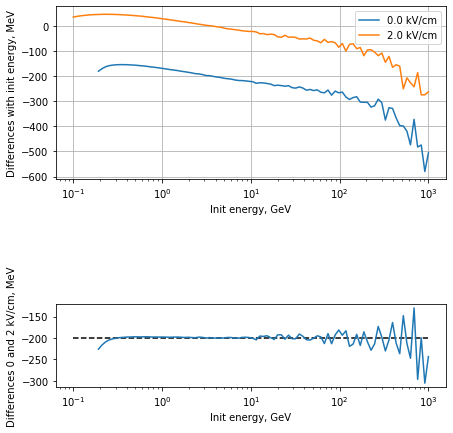

In [20]:
plt.figure(figsize=(7,7))
plt.subplot(211)
for key, value in result_dict.items():
    plt.plot(value["energy"], (value["mean"]-value["energy"])*1000, label="{} kV/cm".format(key/100.0))
plt.grid(True)
plt.ylabel("Differences with\n init energy, MeV")
plt.xlabel("Init energy, GeV")
plt.xscale("log")
plt.legend()
plt.subplot(414)
data_0 = result_dict[0.0]
data_200 = result_dict[200.0]
plt.plot(data_0["energy"], (data_0["mean"] - data_200["mean"])*1000)
plt.ylabel("Differences\n 0 and 2 kV/cm, MeV")
plt.xlabel("Init energy, GeV")
plt.xscale("log")
plt.hlines(-200, data_0["energy"].min(), data_0["energy"].max(), linestyles="dashed")

In [ ]:
def procces_1(data_dict):
    data_0 = data_dict[0.0]
    data_200 = data_dict[200.0]
    shift = lambda x: x["mean"] - x["energy"]
    shift_0 = shift(data_0)
    shift_200 = shift(data_200)
    
        

In [19]:
temp_energy = energy[11]
data_dict = get_data_by_field(path, energy=temp_energy)

(array([    0.,     0.,     0.,     0.,     0., 10000.,     0.,     0.,
            0.,     0.]),
 array([277.756, 277.856, 277.956, 278.056, 278.156, 278.256, 278.356,
        278.456, 278.556, 278.656, 278.756]),
 <a list of 10 Patch objects>)

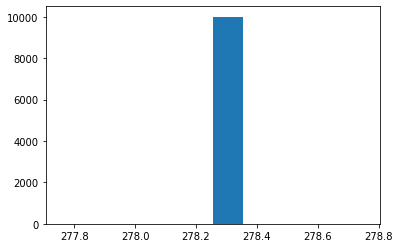

In [20]:
data_0 = data_dict[0.0]
data_200 = data_dict[200.0]
plt.hist(data_0["energy"])
# plt.hist(data_200["energy"])

In [21]:

print(data_0["energy"].mean(), data_0["energy"].std())
print(data_200["energy"].mean(), data_200["energy"].std())

278.256 5.684341886080802e-14
278.256 5.684341886080802e-14


In [22]:
data_200[:100]

array([(0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0, 0, 278.256, 3.14159265, 0., 3534.11158862),
       (0,